Task1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import tensorflow as tf
import io
import re
import string
import tqdm
import numpy as np
from tensorflow.keras import layers

In [3]:
word1=pd.read_csv("/content/drive/MyDrive/words1.csv")
word2=pd.read_csv("/content/drive/MyDrive/words2.csv")

In [4]:
word1

,"Artificial intelligence (AI) is a branch of computer science that aims to create intelligent machines capable of performing tasks that typically require human intelligence. These tasks include learning, reasoning, problem-solving, perception, and language understanding. AI technologies have the potential to revolutionize various industries, from healthcare and finance to transportation and entertainment.\n\nMachine learning is a subset of AI that focuses on developing algorithms and statistical models that enable computers to improve their performance on a specific task over time without being explicitly programmed. It involves the use of data to identify patterns, make predictions, and continuously adapt to changing circumstances.\n\nIn recent years, there has been significant progress in AI and machine learning, leading to the development of advanced systems like self-driving cars, natural language processing, and recommendation engines. As these technologies continue to advance, their impact on society and the economy is expected to grow, posing both opportunities and challenges."


In [5]:
word2

,"Artificial intelligence, often abbreviated as AI, is a field of study that explores the creation of intelligent agents capable of autonomous behavior. These agents are designed to mimic human cognitive functions such as learning, problem-solving, perception, and language understanding. AI has applications in various domains, including robotics, healthcare, finance, and gaming.\n\nMachine learning, a subset of AI, involves the development of algorithms that allow computers to learn from data and improve their performance on a specific task without explicit programming. Supervised learning, unsupervised learning, and reinforcement learning are common approaches in machine learning.\n\nRecent advancements in AI and machine learning have led to breakthroughs in image recognition, natural language processing, and autonomous systems. These technologies are transforming industries and shaping the future of work. As we navigate the possibilities and challenges of AI, ethical considerations and responsible development practices become increasingly important."


In [6]:
#preprocess
from gensim.models import word2vec, FastText,Word2Vec
from nltk.tokenize import word_tokenize
#preprocess
import nltk
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
def preprocess_text(text):
    text = ' '.join(text)

    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    clear_char=list(map(str, range(97, 123)))
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [word for word in tokens if word not in clear_char]
    tokens = [word.rstrip('s').rstrip('ing') for word in tokens]

    return tokens

In [8]:
word2=preprocess_text(word2)
word2

['artificial',
 'intelligence',
 'ofte',
 'abbreviated',
 'a',
 'field',
 'study',
 'explore',
 'creatio',
 'intelligent',
 'agent',
 'capable',
 'autonomou',
 'behavior',
 'agent',
 'designed',
 'mimic',
 'huma',
 'cognitive',
 'functio',
 'lear',
 'problemsolv',
 'perceptio',
 'language',
 'understand',
 'a',
 'applicatio',
 'variou',
 'doma',
 'includ',
 'robotic',
 'healthcare',
 'finance',
 'gam',
 'machine',
 'lear',
 'subset',
 'a',
 'involve',
 'development',
 'algorithm',
 'allow',
 'computer',
 'lear',
 'data',
 'improve',
 'performance',
 'specific',
 'task',
 'without',
 'explicit',
 'programm',
 'supervised',
 'lear',
 'unsupervised',
 'lear',
 'reinforcement',
 'lear',
 'commo',
 'approache',
 'machine',
 'lear',
 'recent',
 'advancement',
 'a',
 'machine',
 'lear',
 'led',
 'breakthrough',
 'image',
 'recognitio',
 'natural',
 'language',
 'process',
 'autonomou',
 'system',
 'technologie',
 'transform',
 'industrie',
 'shap',
 'future',
 'work',
 'navigate',
 'possibili

In [9]:
word1=preprocess_text(word1)
word1

['artificial',
 'intelligence',
 'a',
 'branch',
 'computer',
 'science',
 'aim',
 'create',
 'intelligent',
 'machine',
 'capable',
 'perform',
 'task',
 'typically',
 'require',
 'huma',
 'intelligence',
 'task',
 'include',
 'lear',
 'reaso',
 'problemsolv',
 'perceptio',
 'language',
 'understand',
 'a',
 'technologie',
 'potential',
 'revolutionize',
 'variou',
 'industrie',
 'healthcare',
 'finance',
 'transportatio',
 'entertainment',
 'machine',
 'lear',
 'subset',
 'a',
 'focuse',
 'develop',
 'algorithm',
 'statistical',
 'model',
 'enable',
 'computer',
 'improve',
 'performance',
 'specific',
 'task',
 'time',
 'without',
 'explicitly',
 'programmed',
 'involve',
 'use',
 'data',
 'identify',
 'patter',
 'make',
 'predictio',
 'continuously',
 'adapt',
 'cha',
 'circumstance',
 'recent',
 'year',
 'significant',
 'progre',
 'a',
 'machine',
 'lear',
 'lead',
 'development',
 'advanced',
 'system',
 'like',
 'selfdriv',
 'car',
 'natural',
 'language',
 'process',
 'recommen

In [30]:
#train word2vec model
model = Word2Vec(sentences=[word1,word2], vector_size=2, window=5, min_count=1, workers=4)

# Save the model if needed
model.save("word2vec_model.model")
unique_words = set(word1)

# Get unique word embeddings
unique_word_embeddings = {word: model.wv[word] for word in unique_words}

# Example: Accessing the unique word embeddings
for word, embedding in unique_word_embeddings.items():
    print(f"Word: {word}, Embedding: {embedding}")
# Example: Accessing word vectors


Word: year, Embedding: [-0.43033043 -0.07807899]
Word: variou, Embedding: [-0.20519443  0.04249113]
Word: advanced, Embedding: [0.2002351  0.22771837]
Word: continuously, Embedding: [ 0.4000949  -0.24051493]
Word: perceptio, Embedding: [ 0.22724696 -0.33842838]
Word: huma, Embedding: [-0.07760392  0.01695602]
Word: artificial, Embedding: [-0.13687888  0.11335415]
Word: science, Embedding: [-0.0865479   0.33588624]
Word: develop, Embedding: [0.48227364 0.25385702]
Word: opportunitie, Embedding: [ 0.00255514 -0.49329358]
Word: typically, Embedding: [-0.15361415  0.39549726]
Word: development, Embedding: [-0.22605276  0.32777548]
Word: patter, Embedding: [-0.4208604  -0.25583732]
Word: focuse, Embedding: [0.17537576 0.01142751]
Word: explicitly, Embedding: [0.34223312 0.37738597]
Word: use, Embedding: [0.46796176 0.04469255]
Word: like, Embedding: [-0.21834064 -0.05160373]
Word: impact, Embedding: [-0.03829871 -0.334985  ]
Word: subset, Embedding: [-0.00020269 -0.0130009 ]
Word: significa

In [31]:
unique_words2 = set(word2)
# Get unique word embeddings
unique_word_embeddings2 = {word: model.wv[word] for word in unique_words2}

# Example: Accessing the unique word embeddings
for word, embedding in unique_word_embeddings2.items():
    print(f"Word: {word}, Embedding: {embedding}")
# Example: Accessing word vectors


Word: variou, Embedding: [-0.20519443  0.04249113]
Word: mimic, Embedding: [-0.33880997 -0.06782478]
Word: perceptio, Embedding: [ 0.22724696 -0.33842838]
Word: work, Embedding: [0.07661925 0.0900451 ]
Word: agent, Embedding: [-0.04334419  0.27732208]
Word: huma, Embedding: [-0.07760392  0.01695602]
Word: artificial, Embedding: [-0.13687888  0.11335415]
Word: designed, Embedding: [-0.23021199 -0.25404233]
Word: consideratio, Embedding: [0.19383317 0.13977525]
Word: development, Embedding: [-0.22605276  0.32777548]
Word: possibilitie, Embedding: [0.47764868 0.46399108]
Word: autonomou, Embedding: [-0.40625387  0.22555736]
Word: doma, Embedding: [ 0.07331662 -0.13429825]
Word: cognitive, Embedding: [ 0.13531879 -0.23707561]
Word: programm, Embedding: [0.05650634 0.30315235]
Word: subset, Embedding: [-0.00020269 -0.0130009 ]
Word: technologie, Embedding: [ 0.3714455  -0.07487043]
Word: supervised, Embedding: [ 0.37507692 -0.3074893 ]
Word: practice, Embedding: [ 0.42009383 -0.49276   ]
Wo

In [32]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [33]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import jaccard, euclidean

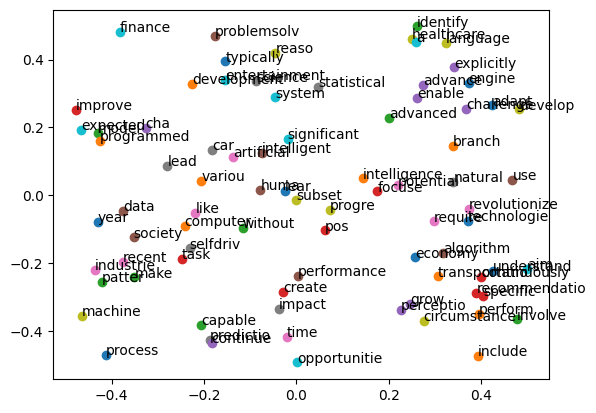

In [34]:
#visualisation

for word, embedding in unique_word_embeddings.items():
  cord=embedding
  plt.scatter(cord[0],cord[1])
  plt.annotate(word,(cord[0],cord[1]))

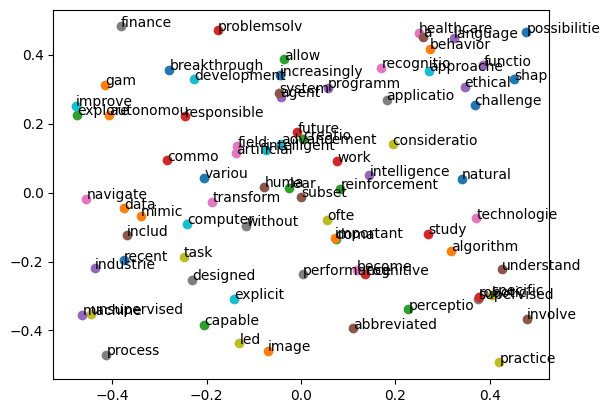

In [35]:
for word, embedding in unique_word_embeddings2.items():
  cord=embedding
  plt.scatter(cord[0],cord[1])
  plt.annotate(word,(cord[0],cord[1]))

**Task2**

In [36]:
def get_embedding(x):
  embedding=[]
  for name,embedding1 in x.items():
    embedding.append((embedding1[0],embedding1[1]))
  return embedding

In [37]:
embedding1=get_embedding(unique_word_embeddings)
embedding2=get_embedding(unique_word_embeddings2)

In [38]:
embedding1=np.array(embedding1)

In [39]:
embedding2=np.array(embedding2)

In [40]:
embedding1.shape

(82, 2)

In [41]:
embedding2.shape

(77, 2)

In [49]:
# Function to calculate cosine similarity
def calculate_cosine_similarity(embeddings1, embeddings2):
    embeddings1 = embeddings1.reshape(1, -1)  # Reshape to a row vector
    embeddings2 = embeddings2.reshape(1, -1)  # Reshape to a row vector
    return cosine_similarity(embeddings1,embeddings2 )[0,0]

In [50]:
def calculate_Euclidean_distance(embeddings1,embeddings2):
  return euclidean(embeddings1,embeddings2)

In [51]:
avg1=np.mean(embedding1,axis=0)
avg2=np.mean(embedding2,axis=0)

In [52]:
avg1,avg2

(array([ 0.02465134, -0.00532518], dtype=float32),
 array([-0.00764344,  0.02671208], dtype=float32))

In [53]:
avg1=np.array(avg1)
avg2=np.array(avg2)
avg1,avg2

(array([ 0.02465134, -0.00532518], dtype=float32),
 array([-0.00764344,  0.02671208], dtype=float32))

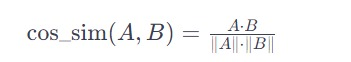

In [54]:
from PIL import Image
equation_of_cosine_similarity = Image.open('/content/drive/MyDrive/WhatsApp Image 2023-12-03 at 22.37.57_a2803a20.jpg')
equation_of_cosine_similarity

In [55]:
cosine_similarity_=calculate_cosine_similarity(avg1,avg2)

In [56]:
cosine_similarity_

-0.47190088

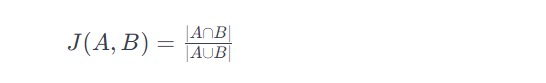

In [57]:
equation_of_jaccard_similarity=Image.open('/content/drive/MyDrive/WhatsApp Image 2023-12-03 at 22.54.47_e1ff8850.jpg')
equation_of_jaccard_similarity

In [58]:
# from sklearn.metrics.pairwise import jaccard_distance
def calculate_jaccard_similarity(set1, set2):
  return len(set1.intersection(set2)) / len(set1.union(set2))

In [60]:
set_doc1 = set(tuple(embedding) for embedding in embedding1)
set_doc2 = set(tuple(embedding) for embedding in embedding2)

jaccard_similarity_=calculate_jaccard_similarity(set_doc1,set_doc2)
jaccard_similarity_

0.2619047619047619

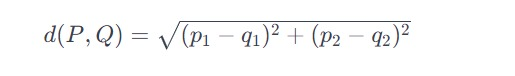

In [61]:
equation_of_euclidean_distance=Image.open('/content/drive/MyDrive/WhatsApp Image 2023-12-03 at 23.16.43_5b6c156f.jpg')
equation_of_euclidean_distance

In [62]:
# Calculate Euclidean distance
euclidean_distance = calculate_Euclidean_distance(avg1, avg2)

euclidean_distance

0.04548998922109604

# **Bonus**

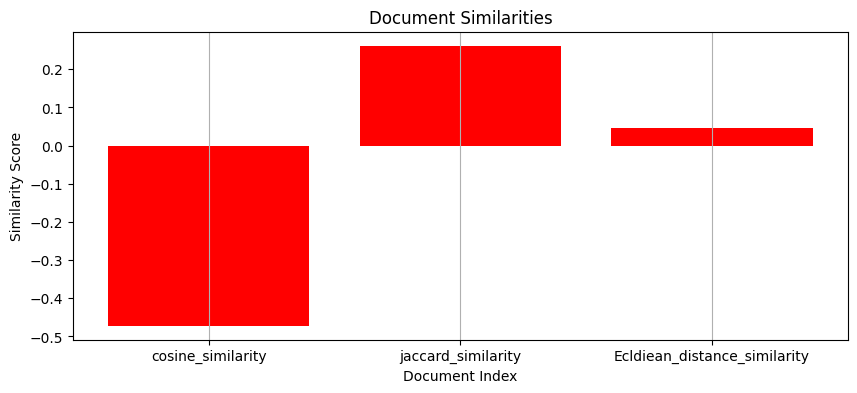

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Example one-dimensional vector (replace this with your actual vector)
similarity_vector = np.array([cosine_similarity_, jaccard_similarity_,euclidean_distance ])

# Plotting bar plot
plt.figure(figsize=(10, 4))

plt.bar(range(len(similarity_vector)), similarity_vector, color='red')
plt.title('Document Similarities')
plt.xlabel('Document Index')
plt.ylabel('Similarity Score')
plt.xticks(range(len(similarity_vector)), ['cosine_similarity', 'jaccard_similarity', 'Ecldiean_distance_similarity'])
plt.grid(axis='x')

plt.show()
